# Logistic Regression - diabetes

In [24]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diabetes.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

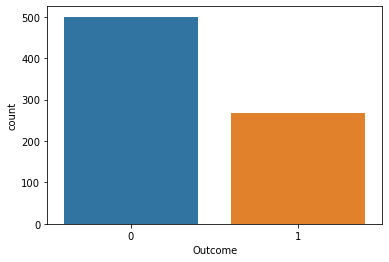

In [6]:
sns.countplot(x=df['Outcome'])

# Train Test Split

In [17]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=12,stratify=y)

In [18]:
y_train.value_counts()

0    375
1    201
Name: Outcome, dtype: int64

In [12]:
500/(500+268)

0.6510416666666666

In [13]:
375/(375+201)

0.6510416666666666

In [16]:
379/(379+197)

0.6579861111111112

# Model Training


In [25]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

# Evaluation

In [26]:
y_pred=logistic_model.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cnf_matrix)
print("*"*50)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy Score: \n",accuracy)
print("*"*50)

clf_report=classification_report(y_test,y_pred)
print("Classification Report: \n",clf_report)

Confusion Matrix: 
 [[110  15]
 [ 24  43]]
**************************************************
Accuracy Score: 
 0.796875
**************************************************
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       125
           1       0.74      0.64      0.69        67

    accuracy                           0.80       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.79      0.80      0.79       192



In [27]:
y_pred=logistic_model.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [28]:
y_pred_prob=logistic_model.predict_proba(x_test)
y_pred_prob

array([[0.45731173, 0.54268827],
       [0.67962347, 0.32037653],
       [0.30824582, 0.69175418],
       [0.93058858, 0.06941142],
       [0.2141897 , 0.7858103 ],
       [0.95423561, 0.04576439],
       [0.8818329 , 0.1181671 ],
       [0.46748204, 0.53251796],
       [0.06696009, 0.93303991],
       [0.71304819, 0.28695181],
       [0.57335003, 0.42664997],
       [0.21549587, 0.78450413],
       [0.03294347, 0.96705653],
       [0.14043839, 0.85956161],
       [0.89897933, 0.10102067],
       [0.78368428, 0.21631572],
       [0.23191319, 0.76808681],
       [0.86081178, 0.13918822],
       [0.86075704, 0.13924296],
       [0.69393023, 0.30606977],
       [0.93088953, 0.06911047],
       [0.83859009, 0.16140991],
       [0.88553044, 0.11446956],
       [0.89489079, 0.10510921],
       [0.68913612, 0.31086388],
       [0.87807823, 0.12192177],
       [0.61138024, 0.38861976],
       [0.95320446, 0.04679554],
       [0.343347  , 0.656653  ],
       [0.47243362, 0.52756638],
       [0.